In [ ]:
Name: Brandon han
Github ID: hanbrand
USC ID:7263220420

<center><h1>Last_First_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.covariance import EmpiricalCovariance

### (a) Download Data

Download the Vertebral Column Data Set from:
https://archive.ics.uci.
edu/ml/datasets/Vertebral+Column

Get the Vertebral Column Data Set

In [147]:
# Load .arff into Dataframe
data = arff.loadarff('../data/column_2C_weka.arff')
df = pd.DataFrame(data[0])

df['class'] = df['class'].apply(lambda x: x.decode('utf-8'))

binary_mapping = {"Normal": 0, "Abnormal":1}
df['class_binary'] = df['class'].map(binary_mapping)

independent_vars = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

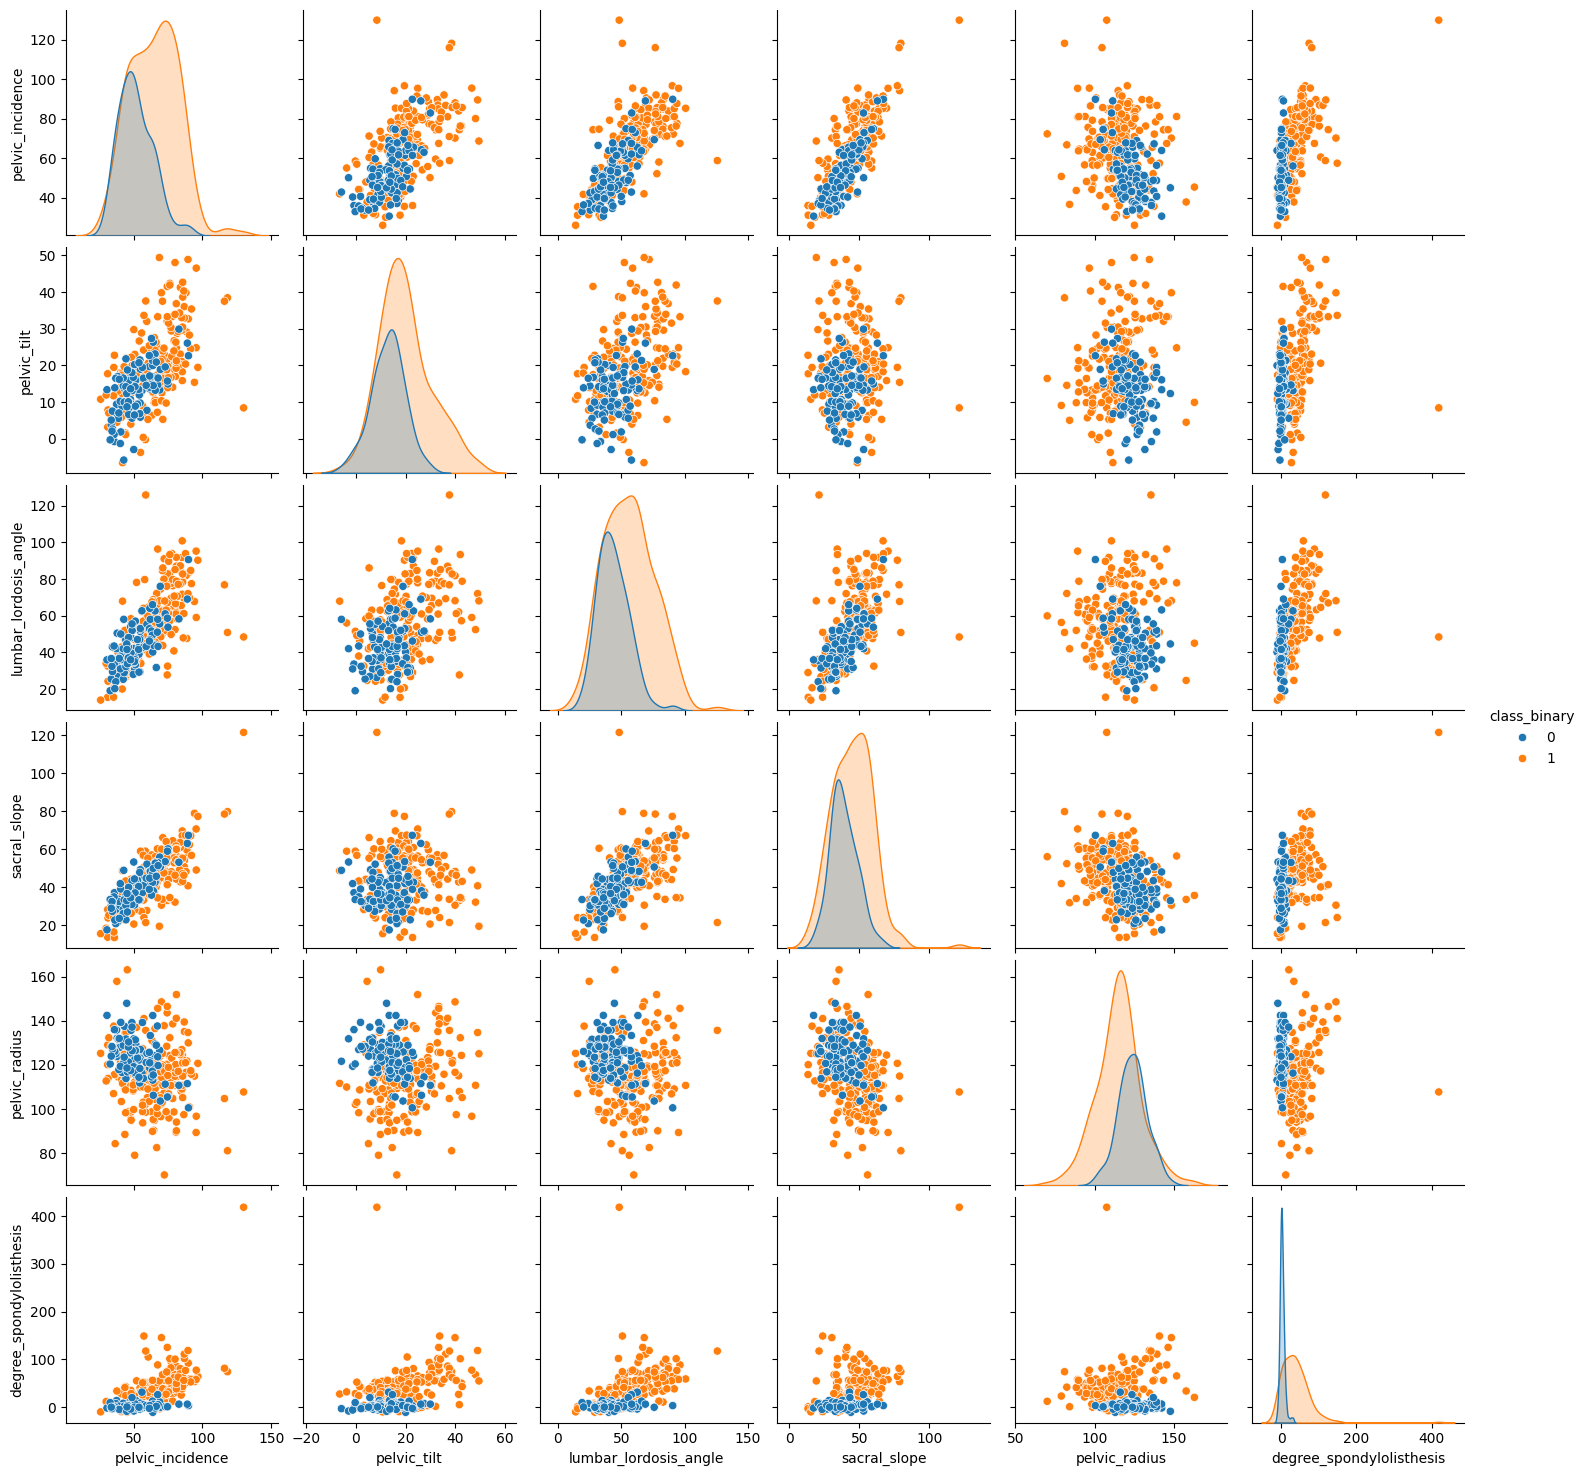

In [148]:
# Create and show plots
sns.pairplot(df[independent_vars + ['class_binary']], hue='class_binary')

plt.show()

#### ii. Boxplots

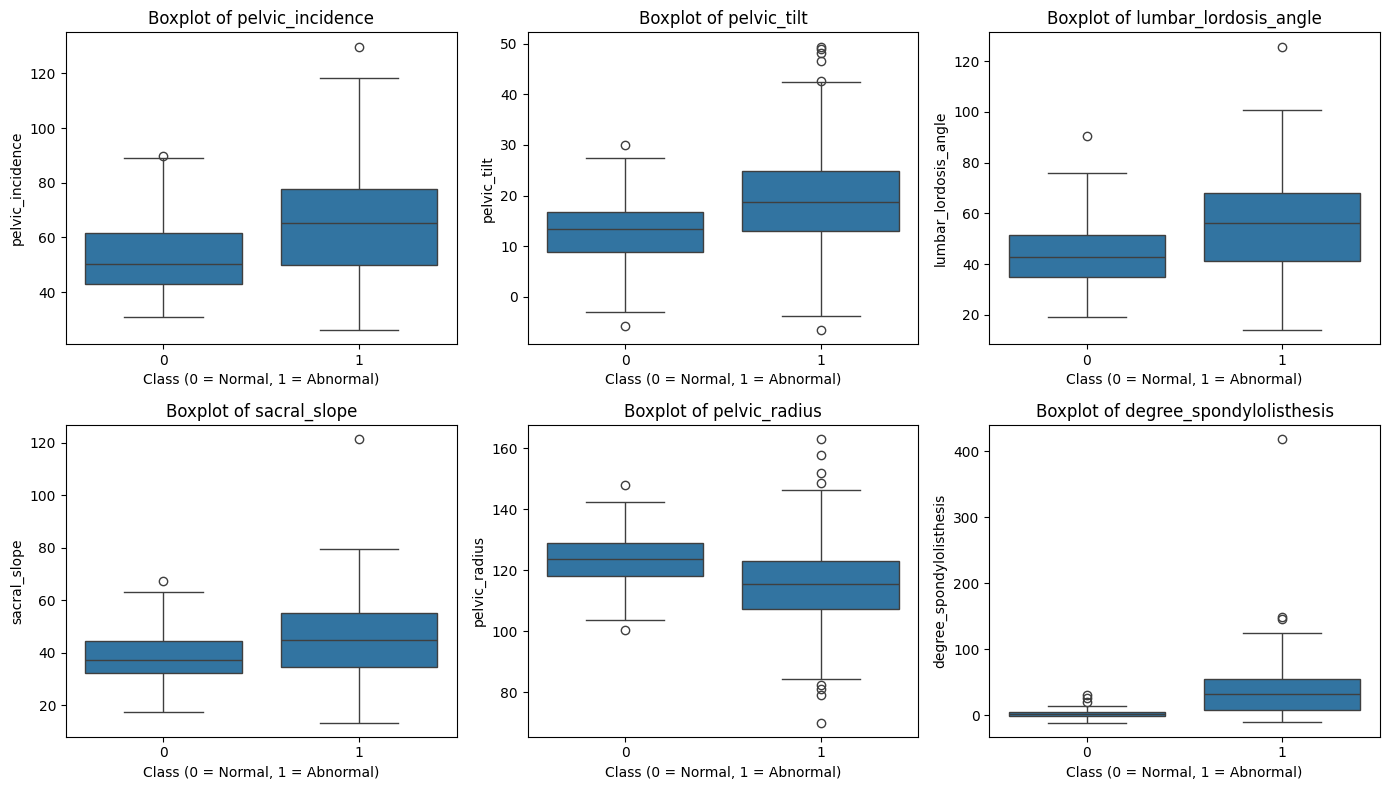

In [149]:
plt.figure(figsize=(14,8))
for i, var in enumerate(independent_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='class_binary',y=var,data=df)
    plt.title(f'Boxplot of {var}')
    plt.xlabel('Class (0 = Normal, 1 = Abnormal)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

#### iii. Split Data Set

In [150]:
# Separate data into classes
class_0 = df[df['class_binary'] == 0]
class_1 = df[df['class_binary'] == 1]

# Select the first 70 rows of Class 0 and first 140 rows of Class 1 as training data
train_class_0 = class_0.iloc[:70]
train_class_1 = class_1.iloc[:140]

# Combine sets to make training set
train_set = pd.concat([train_class_0, train_class_1])

# Create test set with remaining data
test_class_0 = class_0.iloc[70:] 
test_class_1 = class_1.iloc[140:]
test_set = pd.concat([test_class_0, test_class_1])

train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

print("Training set size:", train_set.shape)
print("Test set size:", test_set.shape)

Training set size: (210, 8)
Test set size: (100, 8)


### (c) Classification

#### i. Euclidean Metric

In [151]:
# Separate labels for training and test sets
X_train = train_set.drop(columns=['class', 'class_binary'])
Y_train = train_set['class_binary']

X_test = test_set.drop(columns=['class', 'class_binary'])
Y_test = test_set['class_binary']

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn.fit(X_train, Y_train)

# Make predictions for test set data
Y_pred = knn.predict(X_test)

#### ii. Test Data

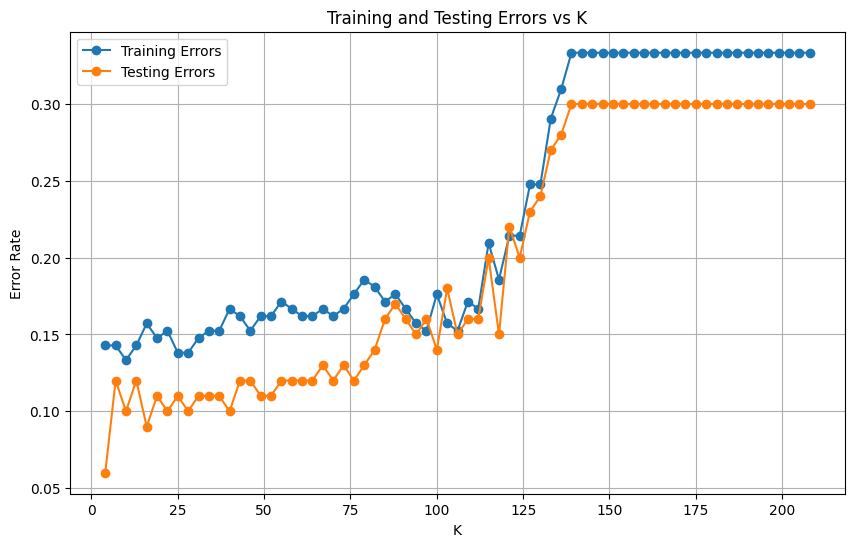

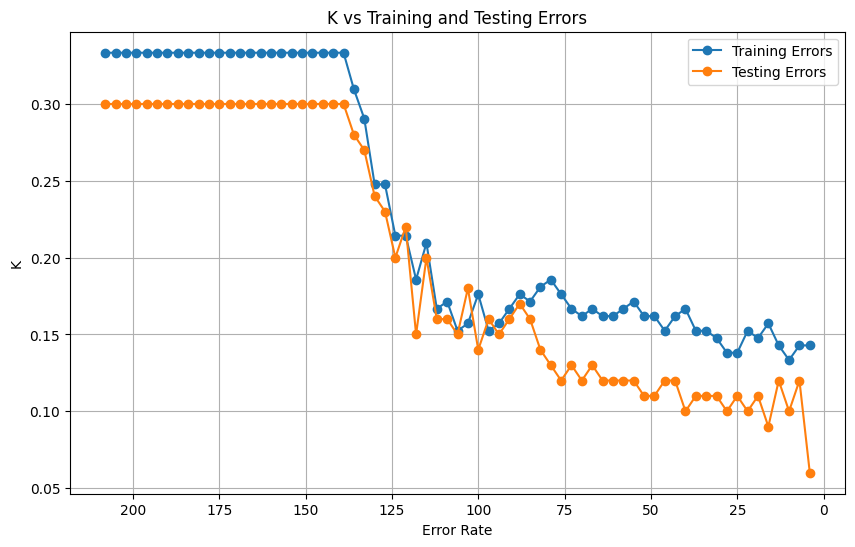

Best k: 4
Confusion Matrix:
[[25  5]
 [ 1 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True Positive Rate: 0.99
True Negative Rate: 0.83
Precision: 1.00
F1-Score: 0.96
Accuracy for k = 4: 94.00%


In [152]:
# Initialize lists for errors
train_errors = []
test_errors = []

# Define values of k to test
k_values = list(range(208, 3, -3))

# Loop through values of k to find best one
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, Y_train)
    
    # Calculate training and test errors
    train_accuracy = knn.score(X_train, Y_train)
    test_accuracy = knn.score(X_test, Y_test)
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

# Plot training and test errors 
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Errors', marker='o')
plt.plot(k_values, test_errors, label='Testing Errors', marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Training and Testing Errors vs K')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Errors', marker='o')
plt.plot(k_values, test_errors, label='Testing Errors', marker='o')
plt.gca().invert_xaxis()
plt.xlabel('Error Rate')
plt.ylabel('K')
plt.title('K vs Training and Testing Errors')
plt.legend()
plt.grid(True)
plt.show()

# Find best k
best_k = k_values[test_errors.index(min(test_errors))]
print(f"Best k: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, Y_train)

Y_pred = knn_best.predict(X_test)

# Print results from model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

TN, FP, FN, TP = confusion_matrix(Y_test, Y_pred).ravel()

# Calculate true positive rate, true negative rate, precision, and F1-score
TPR = recall_score(Y_test, Y_pred)
TNR = TN / (TN + FP)
precision = precision_score(Y_test, Y_test)
f1 = f1_score(Y_test, Y_pred)

# Print the results
print(f"True Positive Rate: {TPR:.2f}")
print(f"True Negative Rate: {TNR:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

# Print accuracy for best k
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy for k = {best_k}: {accuracy * 100:.2f}%")

#### iii. Learning Curve

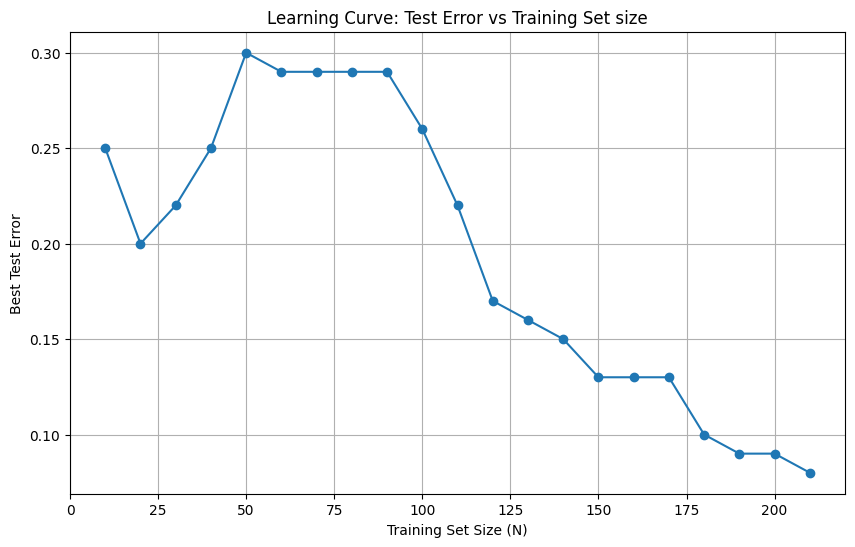

In [153]:
# Store test errors for different training sizes
training_sizes = range(10, 211, 10)
best_test_errors = []

for N in training_sizes:
    num_class_0 = N // 3
    num_class_1 = N - num_class_0
    
    # Create training subset from full set
    train_subset_class_0 = train_class_0.iloc[:num_class_0]
    train_subset_class_1 = train_class_1.iloc[:num_class_1]
    train_subset = pd.concat([train_subset_class_0, train_subset_class_1])
    
    # Separate features and lbels for the subset
    X_train_subset = train_subset.drop(columns=['class', 'class_binary'])
    Y_train_subset = train_subset['class_binary']
    
    # Initalize variables
    best_test_error = np.inf
    best_k = None;
    
    # Test values of k
    for k in range (1, 197, 5):
        if k <= len(X_train_subset):
            knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
            knn.fit(X_train_subset, Y_train_subset)
            # Predict on test set and calculate the test error
            test_accuracy = knn.score(X_test, Y_test)
            test_error = 1 - test_accuracy
            
            # Keep track of the lowest test error and the best k
            if test_error < best_test_error:
                best_test_error = test_error
                best_k = k

        else:
            break

    # Store the best error rate for each training set size
    best_test_errors.append(best_test_error)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, best_test_errors, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error')
plt.title('Learning Curve: Test Error vs Training Set size')
plt.grid(True)
plt.show()



### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [154]:
best_test_errors_manhattan = []
k_values = range(1, 197, 5)

for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k, metric ='minkowski', p=1)
    knn.fit(X_train, Y_train)

    test_accruacy = knn.score(X_test, Y_test)
    test_error = 1 - test_accuracy
    best_test_errors_manhattan.append((k, test_error))

# Find the best k and test error
best_k_manhattan, best_test_error_manhattan = min(best_test_errors_manhattan, key=lambda x: x[1])
print(f"Best k for Manhattan distance: {best_k_manhattan} \nTest error: {best_test_error_manhattan}")

Best k for Manhattan distance: 1 
Test error: 0.30000000000000004


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [155]:
best_test_errors_minkowski = []
log_p_values = np.arange(0.1, 1.1, 0.1)

for log_p in log_p_values:
    p_value = 10 ** log_p # Calculate p from log10(p)
    knn = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='minkowski', p=p_value)
    knn.fit(X_train, Y_train)

    test_accuracy = knn.score(X_test, Y_test)
    test_error = 1 - test_accuracy
    best_test_errors_minkowski.append((log_p, test_error))

# Find the best log10(p) and correspesponding test error
best_log_p, best_test_error_minkowski = min(best_test_errors_minkowski, key=lambda x: x[1])
print(f"Best log10(p) for Minkowski distance: {best_log_p} \nTest error: {best_test_error_minkowski}")

Best log10(p) for Minkowski distance: 0.7000000000000001 
Test error: 0.10999999999999999


##### C. Chebyshev Distance With p -> infinity.

In [156]:
best_test_errors_chebyshev = []
k_values = range(1, 197, 5) 

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, Y_train)

    test_accuracy = knn.score(X_test, Y_test)
    test_error = 1 - test_accuracy
    best_test_errors_chebyshev.append((k, test_error))

# Find best k and test error
best_k_chebyshev, best_test_error_chebyshev = min(best_test_errors_chebyshev, key=lambda x: x[1])

print(f"Best k for Chebyshev distance: {best_k_chebyshev} \nTest error: {best_test_error_chebyshev}")

Best k for Chebyshev distance: 16 
Test error: 0.07999999999999996


#### ii. Mahalanobis Distance.

In [164]:
cov_matrix = np.cov(X_train.T)
pseudo_inv_cov_matrix = np.linalg.pinv(cov_matrix)

best_test_errors_mahalanobis = []
k_values = range(1, 197, 5)

for k in k_values:
    if k <= len(X_train):
        knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': pseudo_inv_cov_matrix})
        knn.fit(X_train, Y_train)

        test_accuracy = knn.score(X_test, Y_test)
        test_error = 1 - test_accuracy
        best_test_errors_mahalanobis.append((k, test_error))
    else:
        break

best_k_mahalanobis, best_test_error_mahalanobis = min(best_test_errors_mahalanobis, key=lambda x: x[1])

print(f"Best k for Mahalanobis distance: {best_k_mahalanobis} \nTest error: {best_test_error_mahalanobis}")

Best k for Mahalanobis distance: 1 
Test error: 0.15000000000000002


### (e) Weighted Decision

In [165]:
k_values = (range(1, 197, 5))
best_test_errors = {}

# Define the distance metrics we will test
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Loop through each distance metric and k value
for metric in distance_metrics:
    best_errors_for_metric = []
    for k in k_values:
        # Initialize the KNeighborsClassifier with weighted voting (weights='distance')
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        
        # Train the k-NN model
        knn.fit(X_train, Y_train)
        
        # Predict on the test set
        y_pred = knn.predict(X_test)
        
        # Calculate test accuracy and error
        test_accuracy = accuracy_score(Y_test, Y_pred)
        test_error = 1 - test_accuracy
        
        # Store the test error for this k value
        best_errors_for_metric.append((k, test_error))
    
    # Find the best k and the corresponding minimum test error for this metric
    best_k, best_test_error = min(best_errors_for_metric, key=lambda x: x[1])
    
    # Store the best test error for this distance metric
    best_test_errors[metric] = (best_k, best_test_error)

# Print out the best test errors for each distance metric
for metric, (best_k, best_error) in best_test_errors.items():
    print(f"Best k for {metric} distance: {best_k} \nTest error: {best_error:.4f}")

Best k for euclidean distance: 1 
Test error: 0.0600
Best k for manhattan distance: 1 
Test error: 0.0600
Best k for chebyshev distance: 1 
Test error: 0.0600


### (f) Training Error Rate

The lowest error is 0.06